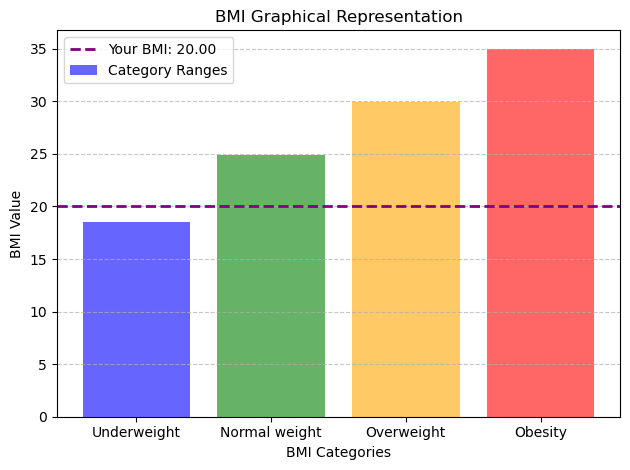

In [ ]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import csv
import os

# Function to calculate BMI and save data
def calculate_bmi():
    try:
        weight = float(weight_entry.get())
        height = float(height_entry.get())
        
        if weight <= 0 or height <= 0:
            messagebox.showerror("Input Error", "Weight and height must be positive numbers.")
            return
        
        # Calculate BMI
        bmi = weight / (height ** 2)
        category = categorize_bmi(bmi)
        
        # Save data to CSV
        save_to_csv(weight, height, bmi, category)
        
        # Display result
        display_bmi_graph(bmi, category)
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")

# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obesity"

# Function to save data to CSV
def save_to_csv(weight, height, bmi, category):
    file_exists = os.path.isfile('bmi_data.csv')
    with open('bmi_data.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["Weight (kg)", "Height (m)", "BMI", "Category"])
        writer.writerow([weight, height, round(bmi, 2), category])

# Function to display BMI graph
def display_bmi_graph(bmi, category):
    categories = ["Underweight", "Normal weight", "Overweight", "Obesity"]
    thresholds = [18.5, 24.9, 29.9, 35]  # Thresholds for the categories
    colors = ['blue', 'green', 'orange', 'red']
    
    plt.bar(categories, thresholds, color=colors, alpha=0.6, label="Category Ranges")
    plt.axhline(y=bmi, color='purple', linestyle='--', linewidth=2, label=f"Your BMI: {bmi:.2f}")
    
    plt.title("BMI Graphical Representation")
    plt.xlabel("BMI Categories")
    plt.ylabel("BMI Value")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Tkinter GUI setup
app = tk.Tk()
app.title("BMI Calculator")
app.geometry("300x200")

tk.Label(app, text="Weight (kg):").pack()
weight_entry = tk.Entry(app)
weight_entry.pack()

tk.Label(app, text="Height (m):").pack()
height_entry = tk.Entry(app)
height_entry.pack()

tk.Button(app, text="Calculate BMI", command=calculate_bmi).pack()

app.mainloop()
